### Домашнее задание

#### 1. Если мы рассчитали 95% доверительный интервал для среднего значения, то какие из следующих утверждений являются верными?

Выберите несколько вариантов и попытайтесь объяснить свой выбор:

1) Если многократно повторять эксперимент, то 95 % выборочных средних значений будут принадлежать рассчитанному нами доверительному интервалу.

2) Мы можем быть на 95% уверены, что среднее значение в генеральной совокупности принадлежит рассчитанному доверительному интервалу.

3) Если многократно повторять эксперимент, для каждой выборки рассчитывать свой доверительный интервал, то в 95 % случаев истинное среднее будет находиться внутри доверительного интервала.

4) Среднее значение в генеральной совокупности точно превышает нижнюю границу 95% доверительного интервала.

5) Среднее значение в генеральной совокупности точно принадлежит рассчитанному доверительному интервалу.

#### 2. Если мы увеличиваем объем выборки в два раза (при условии, что показатель стандартного отклонения остается неизменным), то 95% доверительный интервал

Выберите один вариант из списка

1) стал более узким
2) возможны оба варианта
3) стал более широким

#### 3. В центре 95% доверительного интервала, рассчитанного по выборочным значениям, находится:

Выберите один вариант из списка

1) Значение стандартной ошибки среднего
2) Выборочное среднее значение
3) Среднее значение генеральной совокупности

#### 4. Часто на практике нулевая гипотеза отклоняется, и различия считаются статистически достоверными, если p < 0,05. Однако часто в статистике используется более жесткий критерий достоверности различий, например, при условии, что p < 0,01. Значение p-уровня значимости, которое выбирается, в качестве порога обозначается буквой α (альфа). Например, если исследователь решил, что α = 0,05, то и нулевая гипотеза будет отклоняться при условии, что p < 0,05. 

#### Если в определенной ситуации весьма рискованно отклонить нулевую гипотезу, когда она на самом деле верна, то лучше использовать показатель α равный 

Выберите один вариант из списка

1) 0,1
2) 0,001
3) 0,05
4) 0,5

#### 5. Данные некоторого исследования сообщают нам, что средний рост детей в 14 лет составляет 166 сантиметров. Однако это лишь выборочная оценка, и исследователи рассчитали 95% доверительный интервал, который составил [160, 172]. Укажите верные утверждения:

Выберите несколько вариантов и попытайтесь объяснить свой выбор:

1) У нас достаточно оснований отклонить нулевую гипотезу, что среднее в генеральной совокупности равняется 173
2) Вероятность того, что истинное среднее значение больше 172, составляет 0,01
3) У нас достаточно оснований отклонить нулевую гипотезу, что среднее в генеральной совокупности равняется 158.
4) Доверительный интервал не может иметь такие границы, т. к. выборочное стандартное отклонение равняется 10, следовательно доверительный интервал должен быть значительно шире.

#### 6. Предположим, нулевой гипотезой вашего исследования являлось предположение, что конверсия в генеральной совокупности равняется 0.4. Вы получили p = 0,12 и не смогли отклонить нулевую гипотезу. Однако позже выяснилось, что конверсия в генеральной совокупности действиетльно равна 0.4. Как можно оценить результаты?


Какой вариант корректный по вашему мнению и почему?
1) Вы не совершали ни ошибку первого рода, ни ошибку второго рода.
2) Вы совершили ошибку первого рода
3) Вы совершили ошибку второго рода

In [1]:
# 1. 1, 2
# Выборочное среднее не всегда может корректно представлять генеральное среднее, особенно когда данных мало
# или выборка не репрезентативна. Для этого и рассичтывают доверительный интервал, в котором с (в нашем случае) 95%
# вероятностью будет находится значение генеральной средней, даже если мы возьмем другую выборку.
# 2. 1
# 3. 2
# 4. 2
# 5. 1, 3
# У нас действительно достаточно оснований отклонять гипотезы
# что средний рост равен 173 или 158 с вероятностью 95%,
# т.к данные значения роста не входят в рассчитанный исследователями доверительный интервал
# 6. 1


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from catboost import CatBoostClassifier
from scipy.stats import chi2_contingency, shapiro, mannwhitneyu

In [3]:
# В вебинаре было практическое задание проанализировать две выборки после A/B тестирования,
# данные положить забыли, качала с каггла, вроде эти должны быть
df = pd.read_csv('marketing.csv')

In [6]:
df.head(3)

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True


In [7]:
df.describe()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10037,10021,10022,10037,10022,10037,10037,10037,1856,577,1856,1856
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,1/15/18,House Ads,control,False,English,English,19-24 years,1/16/18,4/2/18,Instagram,True
freq,12,789,4733,5091,8946,9793,9275,1682,163,15,600,1279


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


In [4]:
missings = {}
for ind, el in enumerate(list(df.columns)):
    missings[el] = ((df.isna().sum()[ind]/df.shape[0]) * 100)

In [5]:
# выбрасываем последние 4 признака, там пропусков больше 80%, нет смысла использовать.
pd.DataFrame(missings.values(), index=missings.keys(), columns=['missing %'])

,missing %
user_id,0.000000
date_served,0.159410
marketing_channel,0.149447
variant,0.000000
converted,0.149447
language_displayed,0.000000
language_preferred,0.000000
age_group,0.000000
date_subscribed,81.508419
date_canceled,94.251270


In [161]:
def count_values(dataframe, data, rotation=0, ax=None):
    count = dataframe[data].value_counts()
    index = dataframe[data].value_counts().index
    if ax:          
        plot = ax.bar(index, count)
        ax.set_ylabel('Amount')
        ax.tick_params(rotation=rotation)
        ax.set_title(data)
        ax.bar_label(plot)
    else:
        plt.figure(figsize=(9, 7))
        plot = plt.bar(index, count)      
        plt.ylabel('Amount')
        plt.xticks(rotation=rotation)
        plt.title(data)
        plt.bar_label(plot)

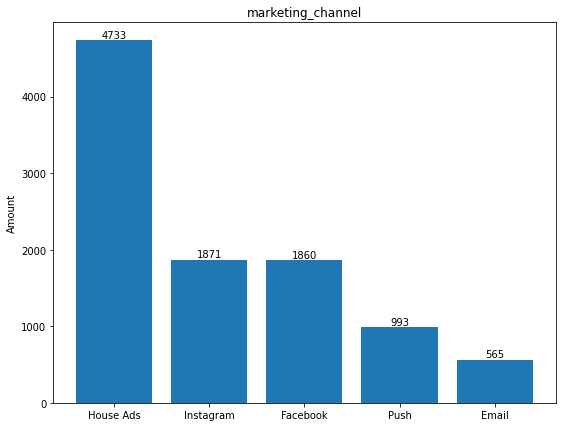

In [91]:
# Посмотрим, что из себя представляют признаки в целом
count_values(df, 'marketing_channel')

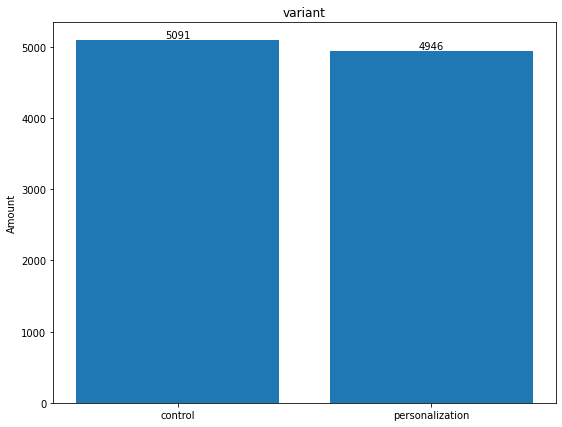

In [92]:
count_values(df, 'variant')

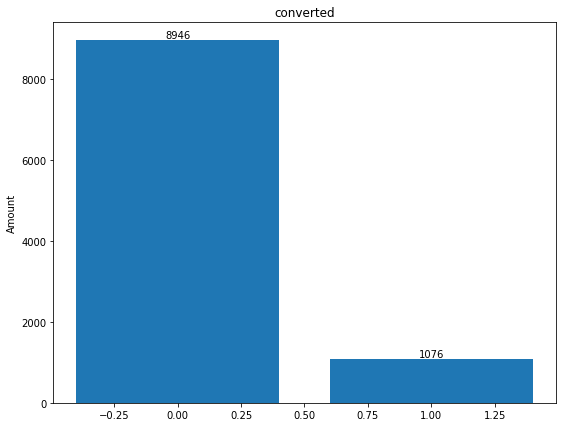

In [93]:
count_values(df, 'converted')

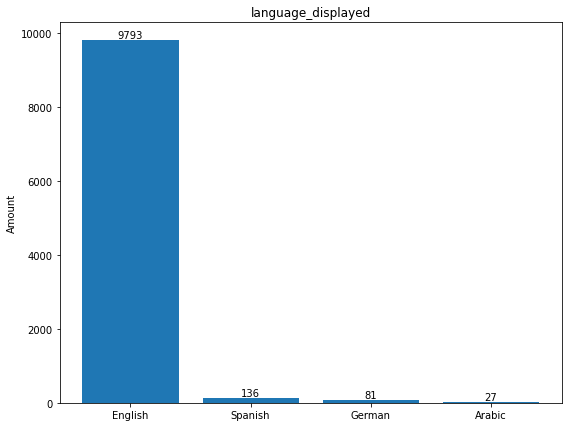

In [94]:
count_values(df, 'language_displayed')

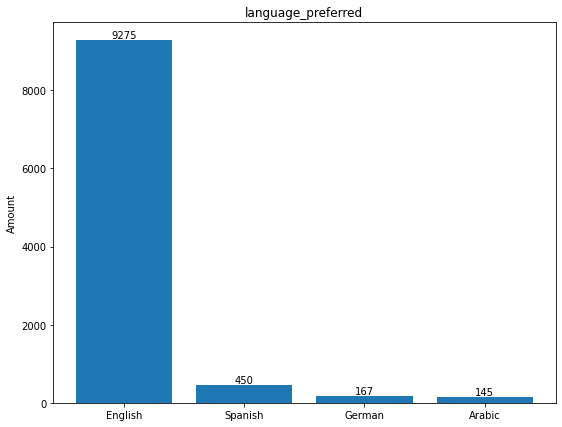

In [95]:
count_values(df, 'language_preferred')

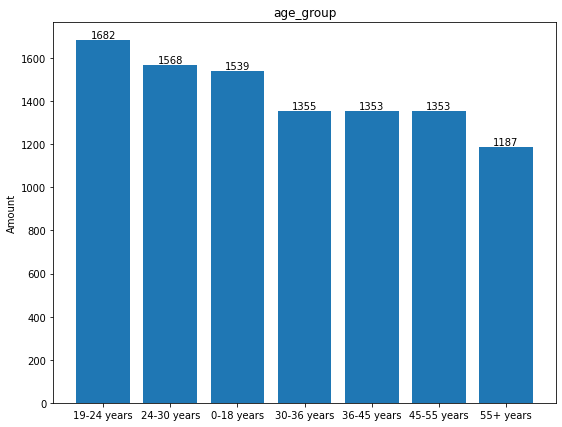

In [96]:
count_values(df, 'age_group')

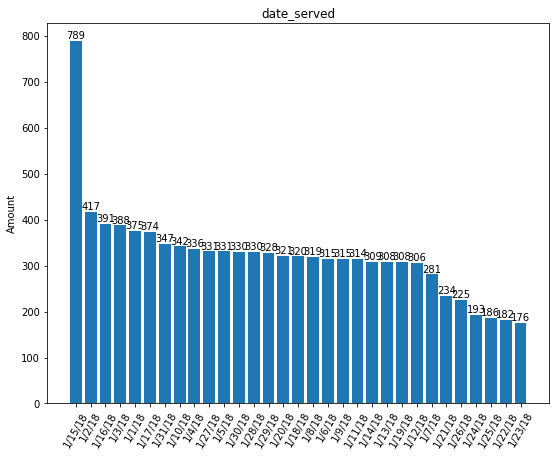

In [97]:
count_values(df, 'date_served', rotation=60)

In [5]:
# Разбиваем данные по признаку наличия взаимодействия
control = df.loc[df.variant == 'control']
personal = df.loc[df.variant == 'personalization']

In [99]:
# Дисбаланса нет, что радует
control.shape[0], personal.shape[0] , df.shape[0], control.shape[0] + personal.shape[0]

(5091, 4946, 10037, 10037)

In [141]:
# теперь анализируем попарно
data = [control, personal]

def show_diff(column, rotation=0):
    fig, axes = plt.subplots(2, figsize=(12, 12))
    for ind, ax in enumerate(axes):
        count_values(data[ind], column, rotation=rotation, ax=ax)


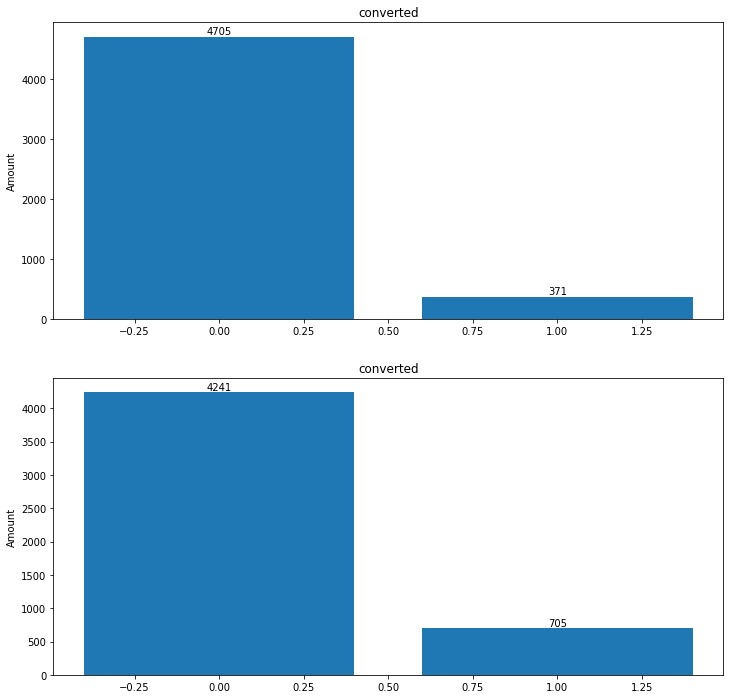

In [162]:
# в группе с персонализацией дела явно идут лучше
show_diff('converted')

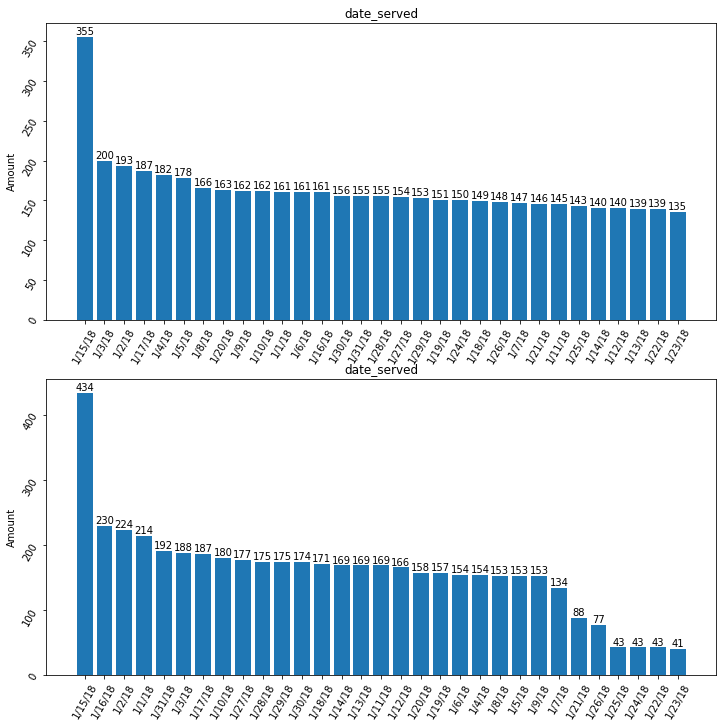

In [143]:
# Есть довольно резкое падение на определенные даты в персонализированной выборке
show_diff('date_served', rotation=60)

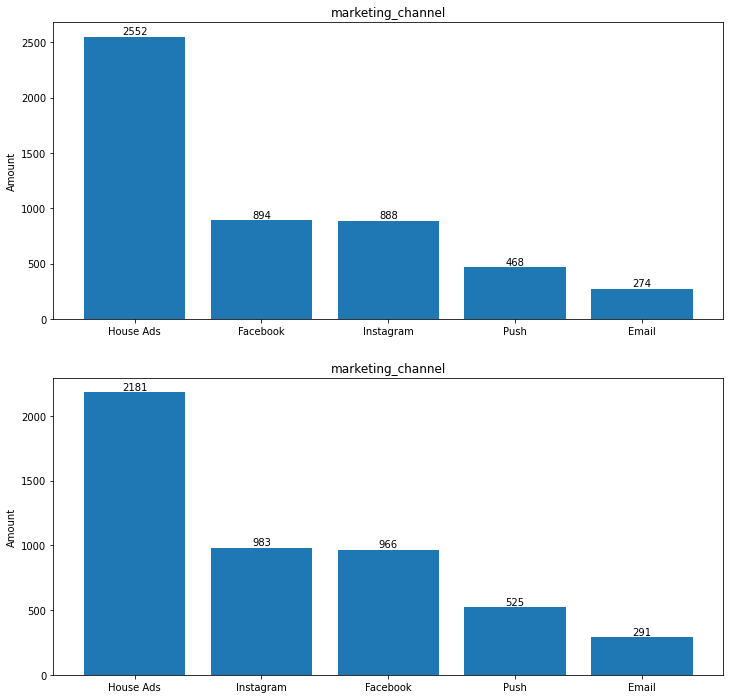

In [144]:
# по сравнению с контрольной группой сделан больший упор на более современные способы коммуникации
show_diff('marketing_channel')

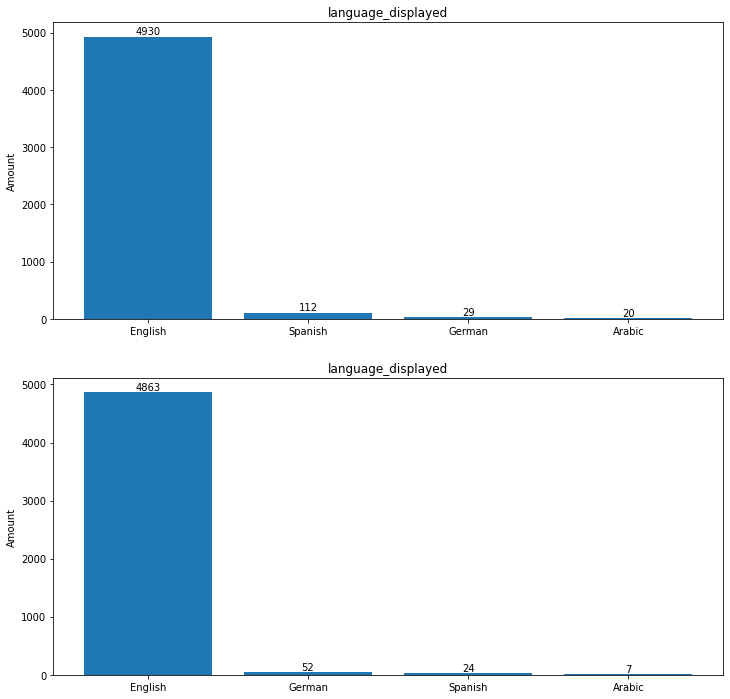

In [163]:
# здесь видимо в персонализацию много не брать других языков
show_diff('language_displayed')

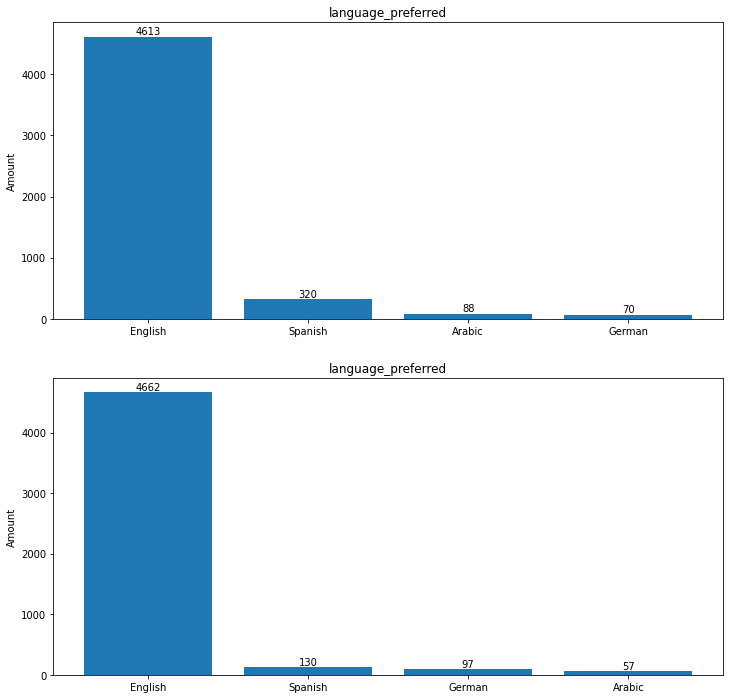

In [164]:
show_diff('language_preferred')

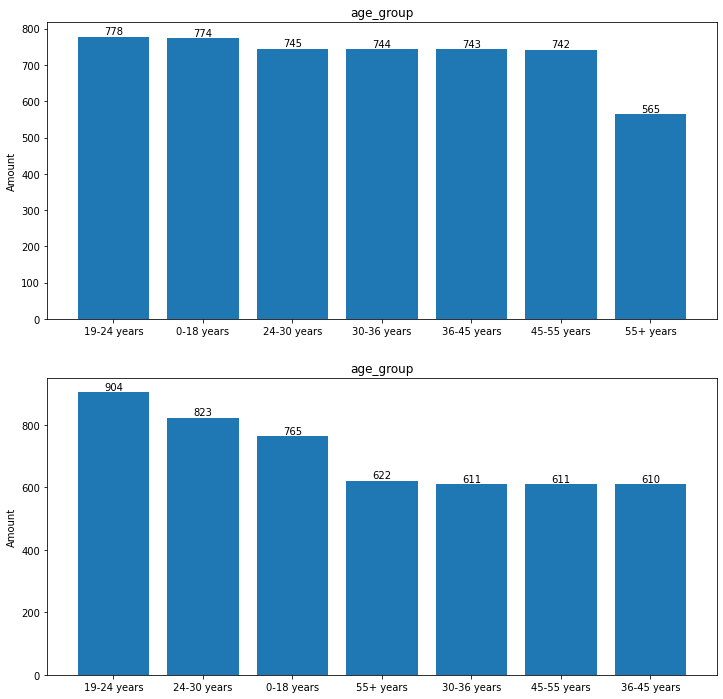

In [165]:
# в группе с первонализацией в есть уклон в более молодую аудитроию
show_diff('age_group')

In [6]:
# убираем ненужное и выбрасываем нули
drop_columns = ['date_subscribed', 'date_canceled', 'subscribing_channel','is_retained']
control.drop(drop_columns, axis=1, inplace=True)
personal.drop(drop_columns, axis=1, inplace=True)

/Users/Viktoryia/Documents/gb/env/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [7]:
control.dropna(inplace=True)
personal.dropna(inplace=True)

/Users/Viktoryia/Documents/gb/env/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [49]:
def show_crosstab(x, y, title):
  crosstab = pd.crosstab(x, y)
  crosstab.plot(kind='bar', figsize=(10, 6))
  plt.title(title)
  plt.ylabel('Amount')
  plt.xticks(rotation=0)

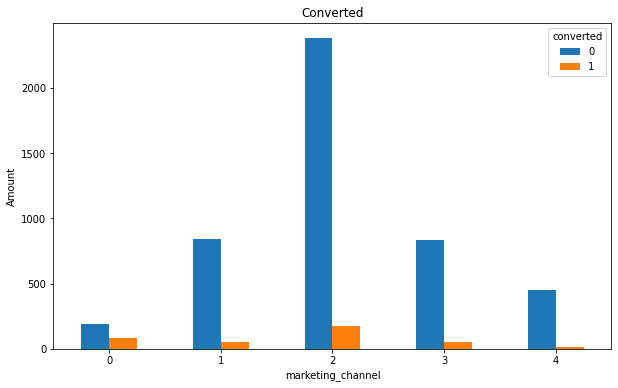

In [50]:
# ну тут все логично - более молодая аудитория, более современные каналы
show_crosstab(control.marketing_channel, control.converted, 'Converted')

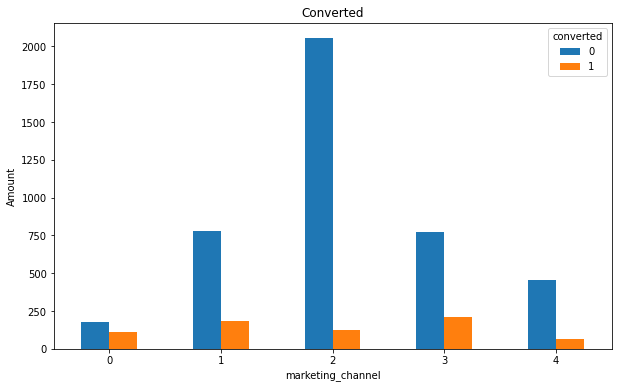

In [51]:
show_crosstab(personal.marketing_channel, personal.converted, 'Converted')

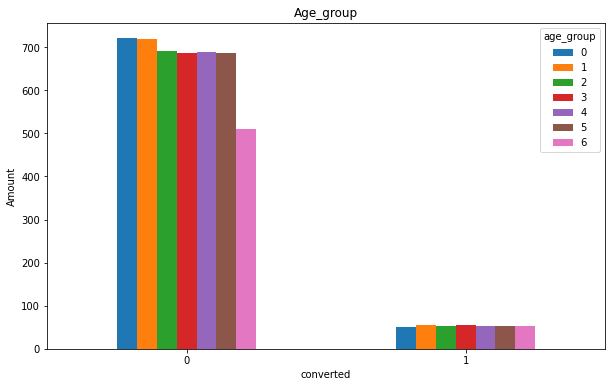

In [52]:
show_crosstab(control.converted, control.age_group, 'Age_group')

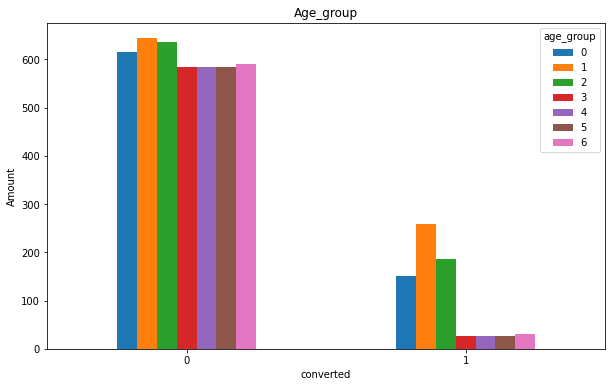

In [53]:
# После взаимодействия молодая аудитория конвертируется на порядок лучше
show_crosstab(personal.converted, personal.age_group, 'Age_group')

In [30]:
# числовое представление
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()
for el in control.columns:
    if el == 'converted':
        control[el] = np.where(control[el] == True, 1, 0)
    else:    
        control[el] = encoder.fit_transform(control[el])
encoder = LabelEncoder()    
for el in personal.columns:
    if el == 'converted':
        personal[el] = np.where(personal[el] == True, 1, 0)
    else:    
        personal[el] = encoder.fit_transform(personal[el])

/var/folders/lw/sfx9kxt17jj8cb5s59ll44q80000gp/T/ipykernel_40235/12285449.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control[el] = encoder.fit_transform(control[el])
/var/folders/lw/sfx9kxt17jj8cb5s59ll44q80000gp/T/ipykernel_40235/12285449.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control[el] = np.where(control[el] == True, 1, 0)
/var/folders/lw/sfx9kxt17jj8cb5s59ll44q80000gp/T/ipykernel_40235/12285449.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [31]:
control.isna().sum()

user_id               0
date_served           0
marketing_channel     0
variant               0
converted             0
language_displayed    0
language_preferred    0
age_group             0
dtype: int64

In [32]:
personal.isna().sum()

user_id               0
date_served           0
marketing_channel     0
variant               0
converted             0
language_displayed    0
language_preferred    0
age_group             0
dtype: int64

In [42]:
def get_statistic(data1, data2, a=0.05):
    stat, p = mannwhitneyu(data1, data2)
    if p > a:
        print(f'P-value: {p} a:{a}, same distribution, fail to reject H0')
    else:
        print(f'P-value {p} a:{a}, different distribution, reject H0')   

In [43]:
# Статистические различия в выборках найдены, что указывает
# на пользу взаимодействия с клиентом
get_statistic(control.converted,personal.converted)

P-value 2.857279483046842e-29, different distribution, reject H0


In [44]:
# На удивление в каналах связи разницы не найдено, хотя по графику они видны.
get_statistic(control.marketing_channel , personal.marketing_channel)

P-value 0.27240968917424235, same distribution, fail to reject H0


In [45]:
# здесь разница есть но с натяжкой, при уменьшении уровня занчимости ее не будет.
get_statistic(control.language_displayed ,personal.language_displayed)

P-value 0.001029527008372227, different distribution, reject H0


In [46]:
# Здесь дела получше, скорее всего эти два признака будут коррелировать, 
# language_displayed можно будет попробовать убрать при построении модели
get_statistic(control.language_preferred , personal.language_preferred)

P-value 1.0265676518656083e-06, different distribution, reject H0


In [47]:
# здесь тоже различий явно меньше, чем видно на графике, но
# при данном уровне значимости они еть
get_statistic(control.age_group, personal.age_group)

P-value 0.0038329917768403473, different distribution, reject H0


In [48]:
# Разное распраделение, признак можно оставить
get_statistic(control.date_served, personal.date_served)

P-value 1.202454133706603e-07, different distribution, reject H0
